<a href="https://colab.research.google.com/github/Prerna0025/Diffusion-model-with-GNN/blob/main/graph_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CiteSeer Dataset** : Represent a citation network \
--> Nodes: Scientific paper \
--> Edges: Citation between paper

OOD issues:
1. Disconneted papers: Some papers in the dataset have no citations at all or not cited by others
2. Topic overlap: Some papers belong to multiple topics, so don't clearly fit into any one topic. This make them outliers
3. Imbalanced topics: Some topics have a lot of papers, while others have very few. This imbalance makes it hard for models to learn equally well for all topics.
4. Content missing or irregular: Certain papers might have incomplete information or their content could be formatted differently from others. This makes these papers stand out.
5. Rare citattion patterns: Some papers cite very unusual or unrelated sources. These papers don't fit the typical citation flow.



In [ ]:
pip install torch-geometric


In [ ]:
from torch_geometric.datasets import Planetoid

citeseer_dataset = Planetoid(root='/tmp/CiteSeer', name='CiteSeer')

data=citeseer_dataset[0]

print(f"Dataset: {citeseer_dataset}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of Edges: {data.num_edges}")
print(f"Number of features: {data.num_node_features}")
print(f"Number of classes: {citeseer_dataset.num_classes}")


Dataset: CiteSeer()
Number of nodes: 3327
Number of Edges: 9104
Number of features: 3703
Number of classes: 6


In [ ]:
print(data)

print(f"Node feature shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")
print(f"Labels shape: {data.y.shape}")

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Node feature shape: torch.Size([3327, 3703])
Edge index shape: torch.Size([2, 9104])
Labels shape: torch.Size([3327])


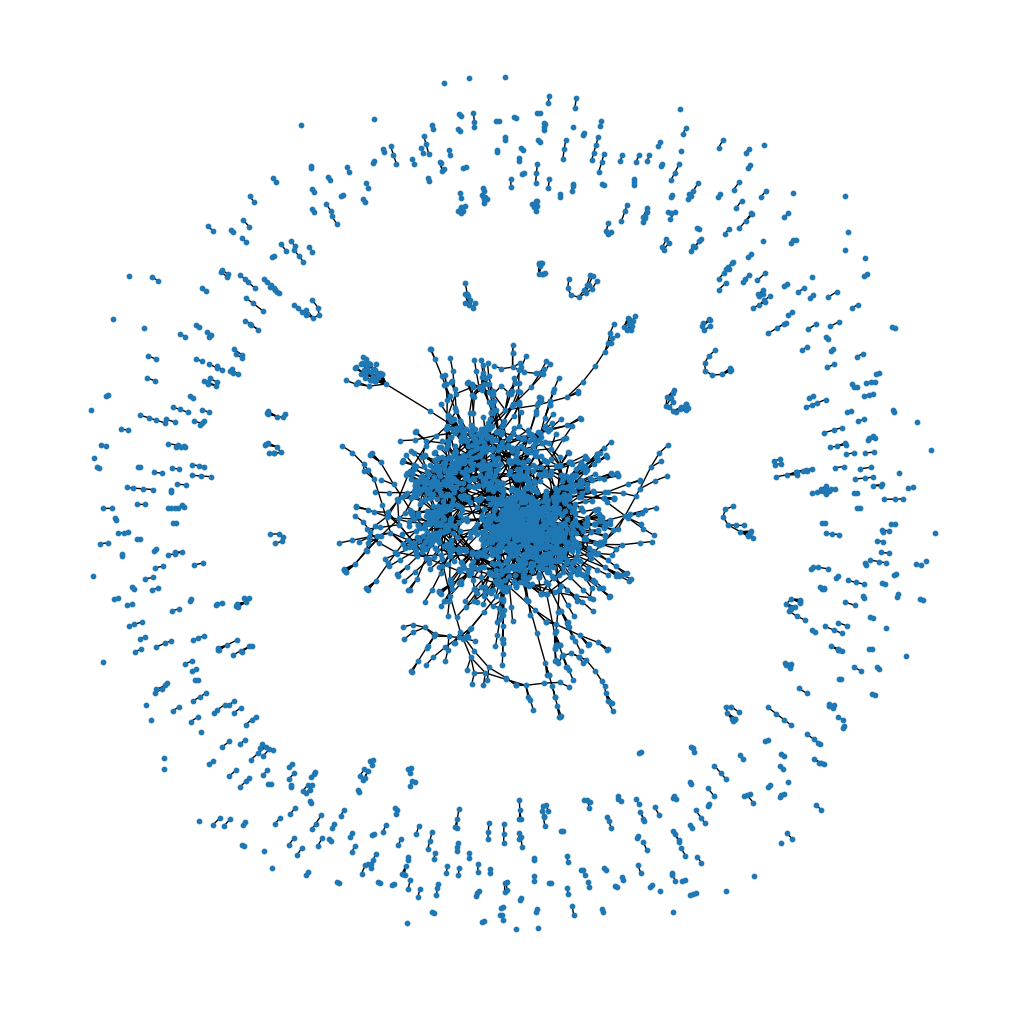

In [ ]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

graph = to_networkx(data, to_undirected=True)
plt.figure(figsize=(10,10))
nx.draw(graph,node_size=10,with_labels=False)
plt.show()

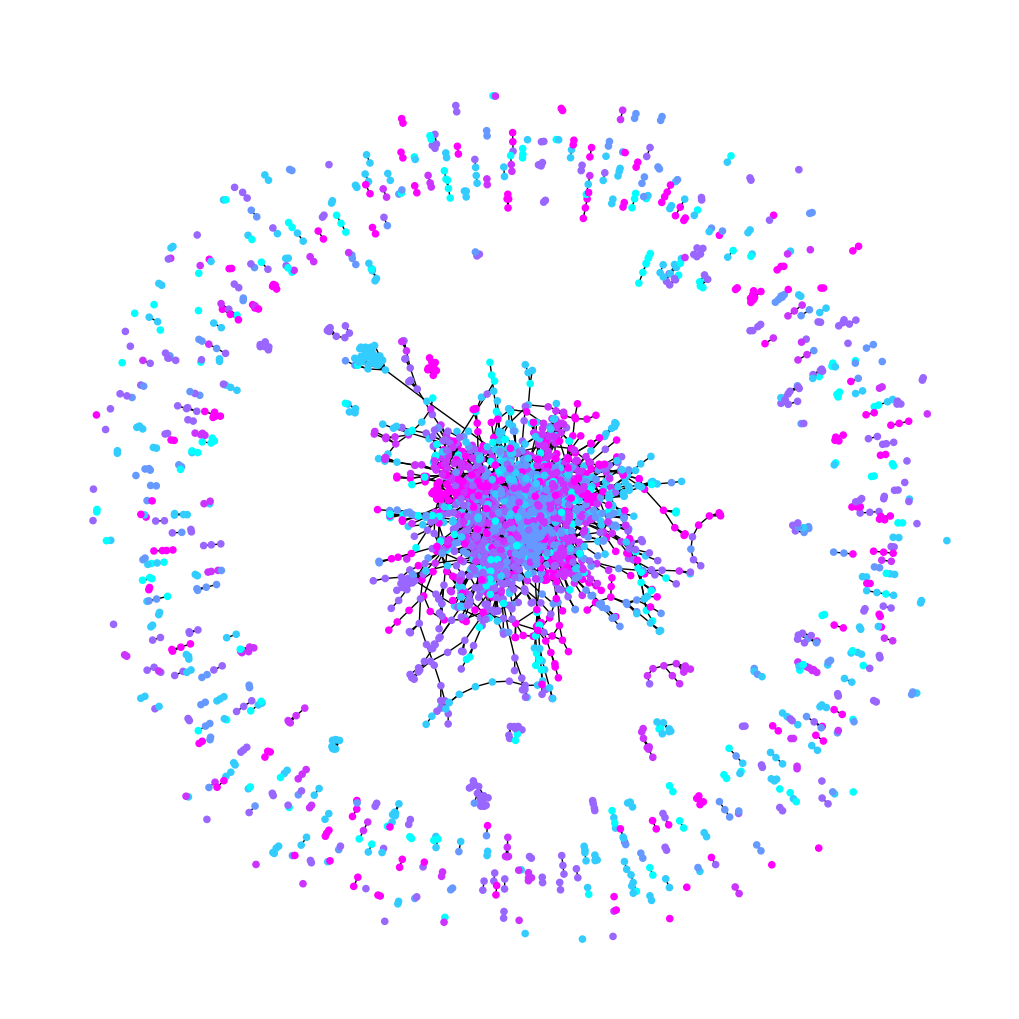

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(
    graph,
    node_color=data.y,
    cmap='cool',
    node_size=20,
    with_labels = False
)
plt.show()

In [ ]:
from collections import Counter
classes = data.y.unique()
print(f"List of classes: {classes}")

class_counts = Counter(data.y.tolist())
for cls,count in class_counts.items():
  print(f"Class: {cls} ---> {count} nodes")



List of classes: tensor([0, 1, 2, 3, 4, 5])
Class: 3 ---> 701 nodes
Class: 1 ---> 590 nodes
Class: 5 ---> 508 nodes
Class: 0 ---> 264 nodes
Class: 2 ---> 668 nodes
Class: 4 ---> 596 nodes


In [ ]:
print(f"Training nodes: {data.train_mask.sum().item()}")
print(f"Validation nodes: {data.val_mask.sum().item()} ")
print(f"Test nodes: {data.test_mask.sum().item()}")

Training nodes: 120
Validation nodes: 500 
Test nodes: 1000


**AMZ Photo Dataset** : Amazon co-purchase graph. It represent relationships between product in the photo category.

Nodes: Product in photo category
Edges: Co-purchase relationships between product
Labels: Categories of product.

OOD issues:
1. Disconnected/ Low degree nodes: Some products have very few or no connections in the co-purchase graph, making them outliers in the network structure.
2. Imbalanced Categories: Certain product categories dominate in the dataset, while others are underrepresented, causing imbalance in the data distribution.
3.Unusual Feature Distributions: Some product nodes have features that significantly differ from others, representing rare or unique products.

In [ ]:
from torch_geometric.datasets import Amazon

Amazon_dataset = Amazon(root='/tmp/Amazon', name = 'Photo')

data = Amazon_dataset[0]
print(f"Dataset : {Amazon_dataset}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of Edges: {data.num_edges}")
print(f"Number of features: {data.num_node_features}")
print(f"Number of classes: {Amazon_dataset.num_classes}")

Dataset : AmazonPhoto()
Number of nodes: 7650
Number of Edges: 238162
Number of features: 745
Number of classes: 8


In [ ]:
print(data)

print(f'Node feature shape: {data.x.shape}')
print(f'Edge index shape: {data.edge_index.shape}')

Data(x=[7650, 745], edge_index=[2, 238162], y=[7650])
Node feature shape: torch.Size([7650, 745])
Edge index shape: torch.Size([2, 238162])


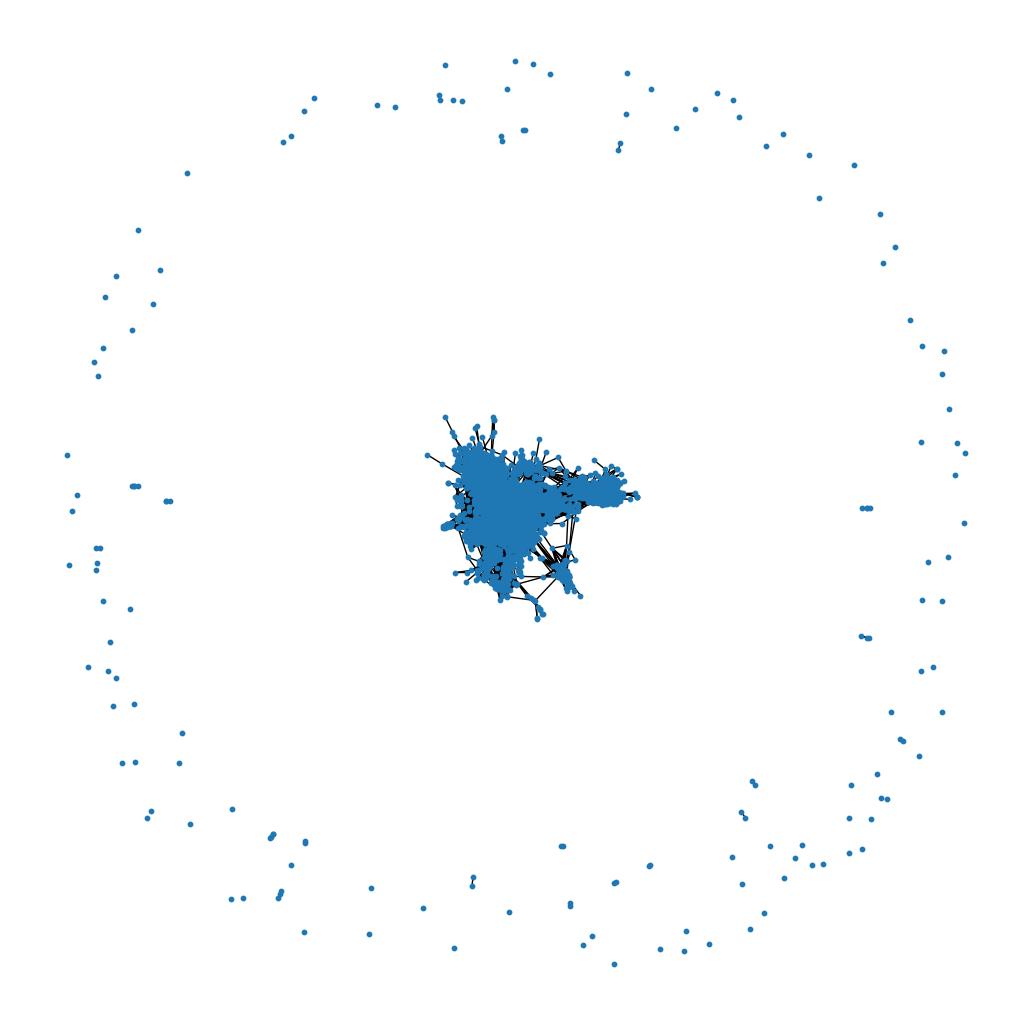

In [ ]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
graph = to_networkx(data,to_undirected=True)
plt.figure(figsize=(10,10))
nx.draw(graph,node_size=10,with_labels=False)
plt.show()

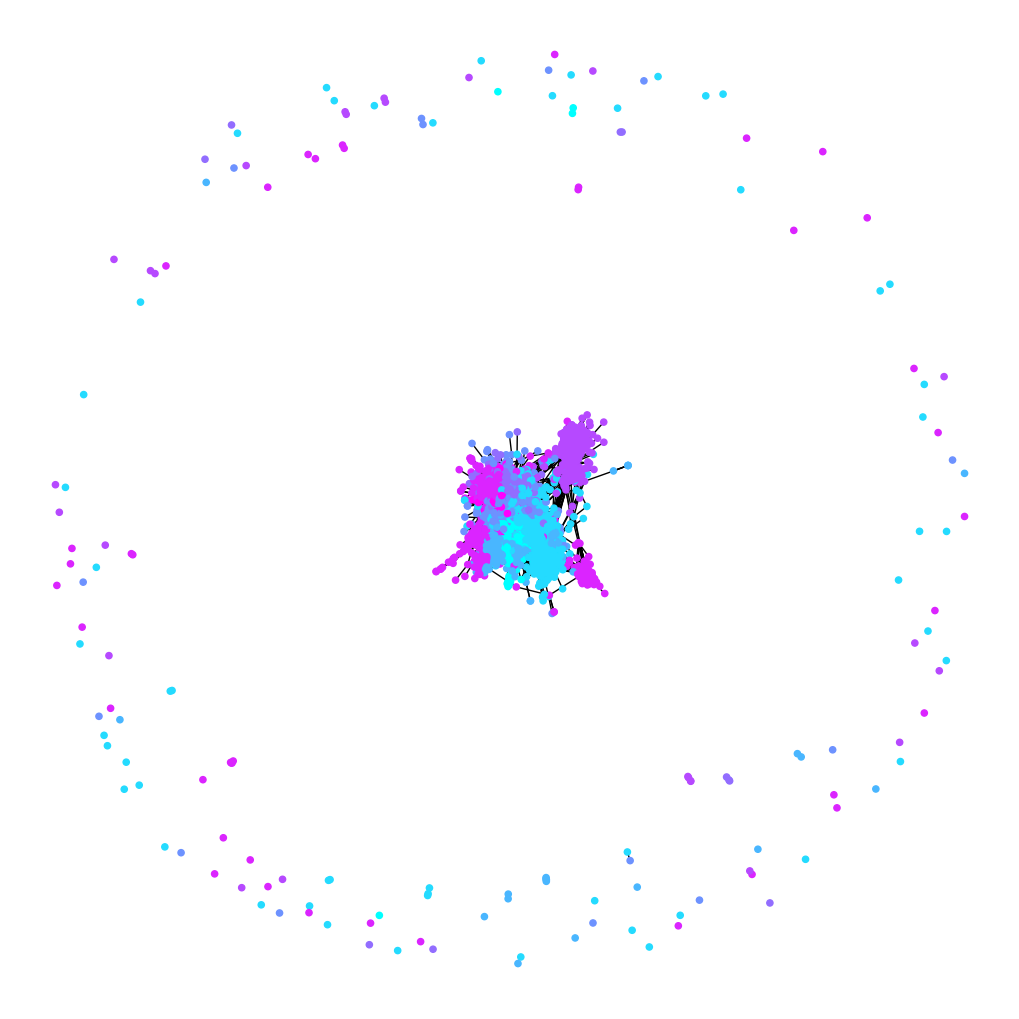

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(
    graph,
    node_color=data.y,
    cmap='cool',
    node_size=20,
    with_labels = False
)
plt.show()

In [ ]:
from collections import Counter
classes = data.y.unique()
print(f"List of classes: {classes}")

class_counts = Counter(data.y.tolist())
for cls,count in class_counts.items():
  print(f"Class: {cls} ---> {count} nodes")

List of classes: tensor([0, 1, 2, 3, 4, 5, 6, 7])
Class: 6 ---> 1941 nodes
Class: 4 ---> 882 nodes
Class: 3 ---> 915 nodes
Class: 5 ---> 823 nodes
Class: 2 ---> 703 nodes
Class: 1 ---> 1686 nodes
Class: 0 ---> 369 nodes
Class: 7 ---> 331 nodes


In [ ]:
import torch
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
num_node=data.num_nodes
indices = torch.randperm(num_node)
train_size = int(train_ratio * num_node)
val_size = int(val_ratio*num_node)

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size+val_size]
test_indices = indices[train_size+val_size:]
data.train_mask = torch.zeros(num_node,dtype=torch.bool)
data.train_mask[train_indices] = True

data.val_mask = torch.zeros(num_node,dtype=torch.bool)
data.val_mask[val_indices] = True

data.test_mask = torch.zeros(num_node,dtype=torch.bool)
data.test_mask[test_indices] = True
print(f"Training nodes: {data.train_mask.sum().item()}")
print(f"Validation nodes: {data.val_mask.sum().item()} ")
print(f"Test nodes: {data.test_mask.sum().item()}")

Training nodes: 4590
Validation nodes: 1530 
Test nodes: 1530
